<Axes: xlabel='x', ylabel='y'>

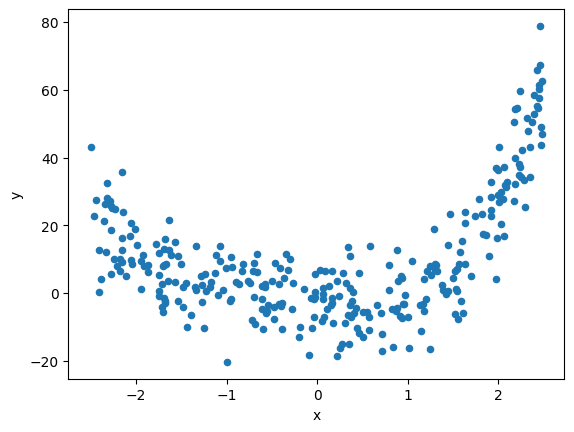

In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [4]:
tree_results = []
X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer['data'][['mean texture', 'mean symmetry']], data_breast_cancer['target'], test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
y_train_predict = tree_clf.predict(X_train)
y_test_predict = tree_clf.predict(X_test)

tree_results.append(tree_clf.get_depth())
tree_results.append(f1_score(y_train, y_train_predict))
tree_results.append(f1_score(y_test, y_test_predict))
tree_results.append(tree_clf.score(X_train, y_train))
tree_results.append(tree_clf.score(X_test, y_test))


In [13]:
best_depth = 0
best_avg_f1 = 0

for depth in range(1, 11):
    temp_tree = DecisionTreeClassifier(max_depth=depth, random_state=42).fit(X_train, y_train)
    y_train_pred = temp_tree.predict(X_train)
    y_test_pred = temp_tree.predict(X_test)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test =  f1_score(y_test, y_test_pred)
    avg_f1 = (f1_test + f1_train) / 2

    print(f"Depth: {depth}, f1_train: {f1_train}, f1_test: {f1_test}, avg f1: {avg_f1}")

    if avg_f1 > best_avg_f1:
        best_avg_f1 = avg_f1
        best_depth = depth

print(f"Best_depth: {best_depth}")

Depth: 1, f1_train: 0.7539062500000001, f1_test: 0.6949152542372881, avg f1: 0.724410752118644
Depth: 2, f1_train: 0.8211243611584327, f1_test: 0.7887323943661971, avg f1: 0.8049283777623149
Depth: 3, f1_train: 0.8211243611584327, f1_test: 0.7887323943661971, avg f1: 0.8049283777623149
Depth: 4, f1_train: 0.8464163822525598, f1_test: 0.7647058823529411, avg f1: 0.8055611323027505
Depth: 5, f1_train: 0.8710217755443886, f1_test: 0.7397260273972602, avg f1: 0.8053739014708244
Depth: 6, f1_train: 0.8965517241379309, f1_test: 0.7310344827586208, avg f1: 0.8137931034482759
Depth: 7, f1_train: 0.9215017064846417, f1_test: 0.7172413793103449, avg f1: 0.8193715428974933
Depth: 8, f1_train: 0.9413793103448277, f1_test: 0.7246376811594204, avg f1: 0.833008495752124
Depth: 9, f1_train: 0.9598603839441536, f1_test: 0.6962962962962963, avg f1: 0.828078340120225
Depth: 10, f1_train: 0.9841269841269841, f1_test: 0.6814814814814815, avg f1: 0.8328042328042328
Best_depth: 8


In [19]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=['mean texture', 'mean symmetry'], class_names=['malignant', 'benign'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)

with open('bc.png', 'wb') as outfile:
    outfile.write(graph.pipe(format='png'))

In [15]:
with open('f1acc_tree.pkl', 'wb') as outfile:
    pickle.dump(tree_results, outfile)
print(tree_results)

[3, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


In [18]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y.reshape(-1,1), test_size=0.2, random_state=42)
tree_regres = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
y_train_pred_regres, y_test_pred_regres = tree_regres.predict(X_train), tree_regres.predict(X_test)
train_mse, test_mse = mean_squared_error( y_train, y_train_pred_regres), mean_squared_error(y_test, y_test_pred_regres)

df_results = []
df_results.append(tree_regres.get_depth())
df_results.append(train_mse)
df_results.append(test_mse)

with open('mse_tree.pkl', 'wb') as outfile:
    pickle.dump(df_results, outfile)
print(df_results)

[3, 65.84979824186101, 78.01010390166495]


In [27]:
best_depth = 0
min_combined_mse = np.inf

for depth in range(1, 11):
    tree_reg_temp = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train)

    y_train_pred_reg = tree_reg_temp.predict(X_train)
    y_test_pred_reg =  tree_reg_temp.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred_reg)
    test_mse =mean_squared_error(y_test, y_test_pred_reg)

    combined_mse = (train_mse + test_mse) / 2
    if combined_mse < min_combined_mse:
        min_combined_mse = combined_mse
        best_depth = depth

    print(f"Depth: {depth}, train_mse: {train_mse}, test_mse: {test_mse}, combined_mse: {combined_mse}")

print(f"Best_depth: {best_depth}")

Depth: 1, train_mse: 133.86321489184508, test_mse: 152.59974760127048, combined_mse: 143.2314812465578
Depth: 2, train_mse: 78.72003901123861, test_mse: 98.36597747140425, combined_mse: 88.54300824132143
Depth: 3, train_mse: 65.84979824186101, test_mse: 78.01010390166495, combined_mse: 71.92995107176299
Depth: 4, train_mse: 55.79698514931564, test_mse: 89.41890388625617, combined_mse: 72.60794451778591
Depth: 5, train_mse: 47.02489858367047, test_mse: 87.42018797217261, combined_mse: 67.22254327792155
Depth: 6, train_mse: 40.00336491767106, test_mse: 86.11285227920108, combined_mse: 63.058108598436064
Depth: 7, train_mse: 32.38635472217222, test_mse: 94.0590564502927, combined_mse: 63.222705586232465
Depth: 8, train_mse: 27.717352451397574, test_mse: 93.48444474936828, combined_mse: 60.600898600382926
Depth: 9, train_mse: 23.963040285929633, test_mse: 103.90180991855217, combined_mse: 63.932425102240906
Depth: 10, train_mse: 17.765426585340876, test_mse: 99.90040380073404, combined_mse

In [24]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

dot_string = export_graphviz(tree_regres, out_file=None, rounded=True, filled=True)
graph = graphviz.Source(dot_string)

with open('reg.png', 'wb') as outfile:
    outfile.write(graph.pipe(format='png'))

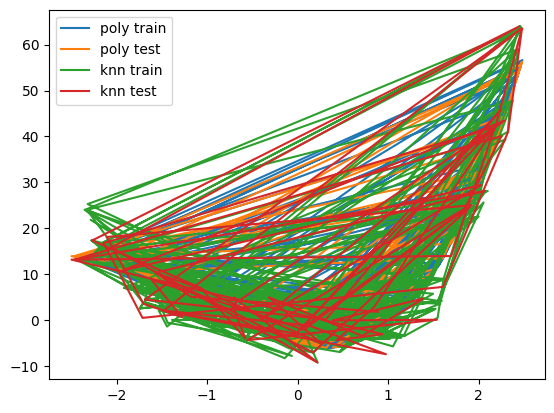

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
lin_regres_poly = LinearRegression().fit(X_train_poly, y_train)
lin_regres_poly_t = LinearRegression().fit(X_test_poly, y_test)

y_train_pred_poly = lin_regres_poly.predict(X_train_poly)
y_test_pred_poly = lin_regres_poly.predict(X_test_poly)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

plt.plot(X_train, y_train_pred_poly, label='poly train')
plt.plot(X_test, y_test_pred_poly, label='poly test')
plt.plot(X_train, y_train_pred_knn, label='knn train')
plt.plot(X_test, y_test_pred_knn, label='knn test')
plt.legend()
plt.show()